# NAML Project 4

Credit Card Fraud Detection 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import jax.numpy as jnp
import jax
from tqdm.notebook import tqdm

Load the data

In [88]:
dataset = pd.read_csv('creditcard.csv')

## Data Inspection

Check if there are some missing entries

In [89]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Remove records with missing entries 

In [90]:
dataset = dataset.dropna()
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visualize the first rows of the dataset

In [91]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Visualize information about the dataset including the index dtype and columns, non-null values and memory usage.

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277214 entries, 0 to 277213
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    277214 non-null  float64
 1   V1      277214 non-null  float64
 2   V2      277214 non-null  float64
 3   V3      277214 non-null  float64
 4   V4      277214 non-null  float64
 5   V5      277214 non-null  float64
 6   V6      277214 non-null  float64
 7   V7      277214 non-null  float64
 8   V8      277214 non-null  float64
 9   V9      277214 non-null  float64
 10  V10     277214 non-null  float64
 11  V11     277214 non-null  float64
 12  V12     277214 non-null  float64
 13  V13     277214 non-null  float64
 14  V14     277214 non-null  float64
 15  V15     277214 non-null  float64
 16  V16     277214 non-null  float64
 17  V17     277214 non-null  float64
 18  V18     277214 non-null  float64
 19  V19     277214 non-null  float64
 20  V20     277214 non-null  float64
 21  V21     27

Visualize first order statistics of the dataset including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [93]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000,277214.000000
mean,92755.404832,-0.002540,-0.008993,0.021594,0.004187,-0.008474,0.003640,-0.003355,-0.000703,0.000098,0.000696,0.008841,-0.006925,0.000724,0.002354,0.005460,-0.000343,0.001204,-0.002722,-0.000150,0.000426,-0.000181,-0.002314,-0.001151,-0.000225,0.003981,-0.000009,0.000044,0.000136,88.952076,0.001757
std,46453.156246,1.956608,1.651652,1.512832,1.416157,1.380571,1.330945,1.236990,1.191776,1.100917,1.086157,1.022176,1.005766,0.998371,0.959782,0.918318,0.878258,0.852010,0.839427,0.815019,0.774692,0.736274,0.723648,0.626698,0.605934,0.519820,0.483011,0.403068,0.331691,251.099738,0.041877
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,53358.000000,-0.920445,-0.604115,-0.858114,-0.847399,-0.700261,-0.764317,-0.556993,-0.207208,-0.646386,-0.532520,-0.753702,-0.412622,-0.650146,-0.421286,-0.578680,-0.470015,-0.481595,-0.500265,-0.458776,-0.211168,-0.227555,-0.540020,-0.162509,-0.354304,-0.312323,-0.327792,-0.070670,-0.052475,5.770000,0.000000
50%,82755.500000,0.019743,0.061254,0.204975,-0.012660,-0.064373,-0.269191,0.035502,0.023215,-0.052596,-0.091514,-0.025703,0.135142,-0.013645,0.051766,0.056900,0.065954,-0.063885,-0.006500,0.003412,-0.061496,-0.029960,0.004901,-0.012451,0.041653,0.023963,-0.053847,0.001599,0.011736,22.300000,0.000000
75%,136883.000000,1.305775,0.794830,1.043851,0.754276,0.601491,0.402827,0.564675,0.326710,0.600241,0.456589,0.750133,0.615948,0.663953,0.493926,0.657827,0.524917,0.400418,0.498522,0.461075,0.134407,0.184181,0.522223,0.145525,0.437542,0.353345,0.242322,0.090413,0.077918,78.000000,0.000000
max,167520.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Print distribution and approximation of data related to the seconds elapsed between each transaction and the first transaction

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


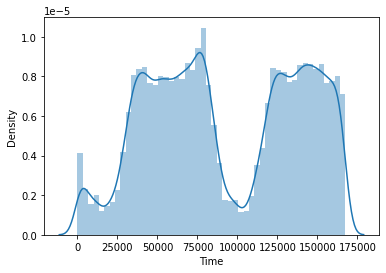

In [94]:
sns.distplot(dataset['Time'])

Visualize pairwise correlation of columns


In [95]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.121300,-0.020194,-0.417995,-0.105630,0.171547,-0.061699,0.084468,-0.039884,-0.008938,0.033314,-0.245357,0.118302,-0.067807,-0.099514,-0.182179,0.011821,-0.074418,0.089457,0.030097,-0.052252,0.046460,0.146416,0.050462,-0.017622,-0.232775,-0.043443,-0.005227,-0.009168,-0.007105,-0.011669
V1,0.121300,1.000000,0.012155,-0.001193,-0.004783,-0.002453,-0.000482,-0.002854,0.005911,0.000850,0.004467,-0.003840,0.001247,-0.001284,0.005499,-0.000921,0.001583,0.004063,0.002463,-0.000727,0.005663,-0.000033,0.001118,0.001585,-0.000934,0.004447,-0.000191,0.001556,-0.000541,-0.230789,-0.103206
V2,-0.020194,0.012155,1.000000,0.008155,0.002083,0.001157,0.002153,0.001274,-0.005042,-0.002853,-0.005820,0.004563,-0.004445,0.001462,-0.002929,0.002424,-0.002677,-0.004185,-0.001248,-0.000094,-0.003055,0.001507,-0.001765,0.001902,0.000448,-0.001517,-0.000354,0.000325,-0.005263,-0.534035,0.092991
V3,-0.417995,-0.001193,0.008155,1.000000,-0.003400,0.000578,-0.002322,-0.000047,0.004833,0.003900,0.005433,-0.003253,0.006685,-0.001776,0.004173,-0.001584,-0.000117,0.006026,0.001124,-0.002104,0.003080,0.000004,0.002756,0.004267,0.000836,0.000287,0.001184,0.000135,-0.000274,-0.213467,-0.196511
V4,-0.105630,-0.004783,0.002083,-0.003400,1.000000,0.000283,-0.001337,-0.001388,0.001290,0.002800,-0.003058,0.001025,0.001046,0.000500,0.000241,-0.000126,-0.002855,-0.000364,-0.000001,-0.001283,0.001030,-0.000830,-0.000032,-0.000905,0.000147,-0.000172,-0.000329,0.000573,0.001778,0.098791,0.135449
V5,0.171547,-0.002453,0.001157,0.000578,0.000283,1.000000,-0.001560,-0.002318,0.002387,0.003587,0.005297,-0.002299,0.000176,0.002049,0.004293,0.001670,0.002723,0.000575,0.002699,0.000644,0.002185,-0.000130,0.000314,0.004134,-0.001546,0.001026,-0.001370,-0.000289,0.000783,-0.385546,-0.096360
V6,-0.061699,-0.000482,0.002153,-0.002322,-0.001337,-0.001560,1.000000,0.001834,0.000843,0.002354,0.001024,-0.002385,0.001605,0.000397,0.000372,-0.002830,0.000241,0.000626,0.000668,0.002302,-0.000473,0.000953,-0.000189,-0.001609,-0.001391,0.000962,-0.000409,0.001219,0.000913,0.215533,-0.044210
V7,0.084468,-0.002854,0.001274,-0.000047,-0.001388,-0.002318,0.001834,1.000000,0.001512,0.004095,0.004588,-0.001792,0.003944,0.001017,0.003689,0.002530,0.003823,0.003076,0.002449,-0.001659,-0.000411,-0.002857,0.000381,0.000040,0.000207,-0.001465,-0.001503,-0.002353,0.000582,0.396550,-0.190227
V8,-0.039884,0.005911,-0.005042,0.004833,0.001290,0.002387,0.000843,0.001512,1.000000,-0.002982,-0.005073,0.002171,-0.001309,-0.000203,-0.003326,-0.000201,-0.001906,-0.002312,-0.000330,0.000659,0.001617,-0.004545,0.002624,-0.000634,0.000262,-0.001041,0.000433,-0.001509,-0.002263,-0.103250,0.020090
V9,-0.008938,0.000850,-0.002853,0.003900,0.002800,0.003587,0.002354,0.004095,-0.002982,1.000000,-0.005324,0.000805,-0.005180,0.002576,0.003851,-0.005176,-0.001669,0.003386,0.001021,0.000210,-0.003914,0.000424,0.001761,-0.001868,-0.000066,0.000640,0.002578,-0.002856,0.000203,-0.043358,-0.098985


Display correlations 

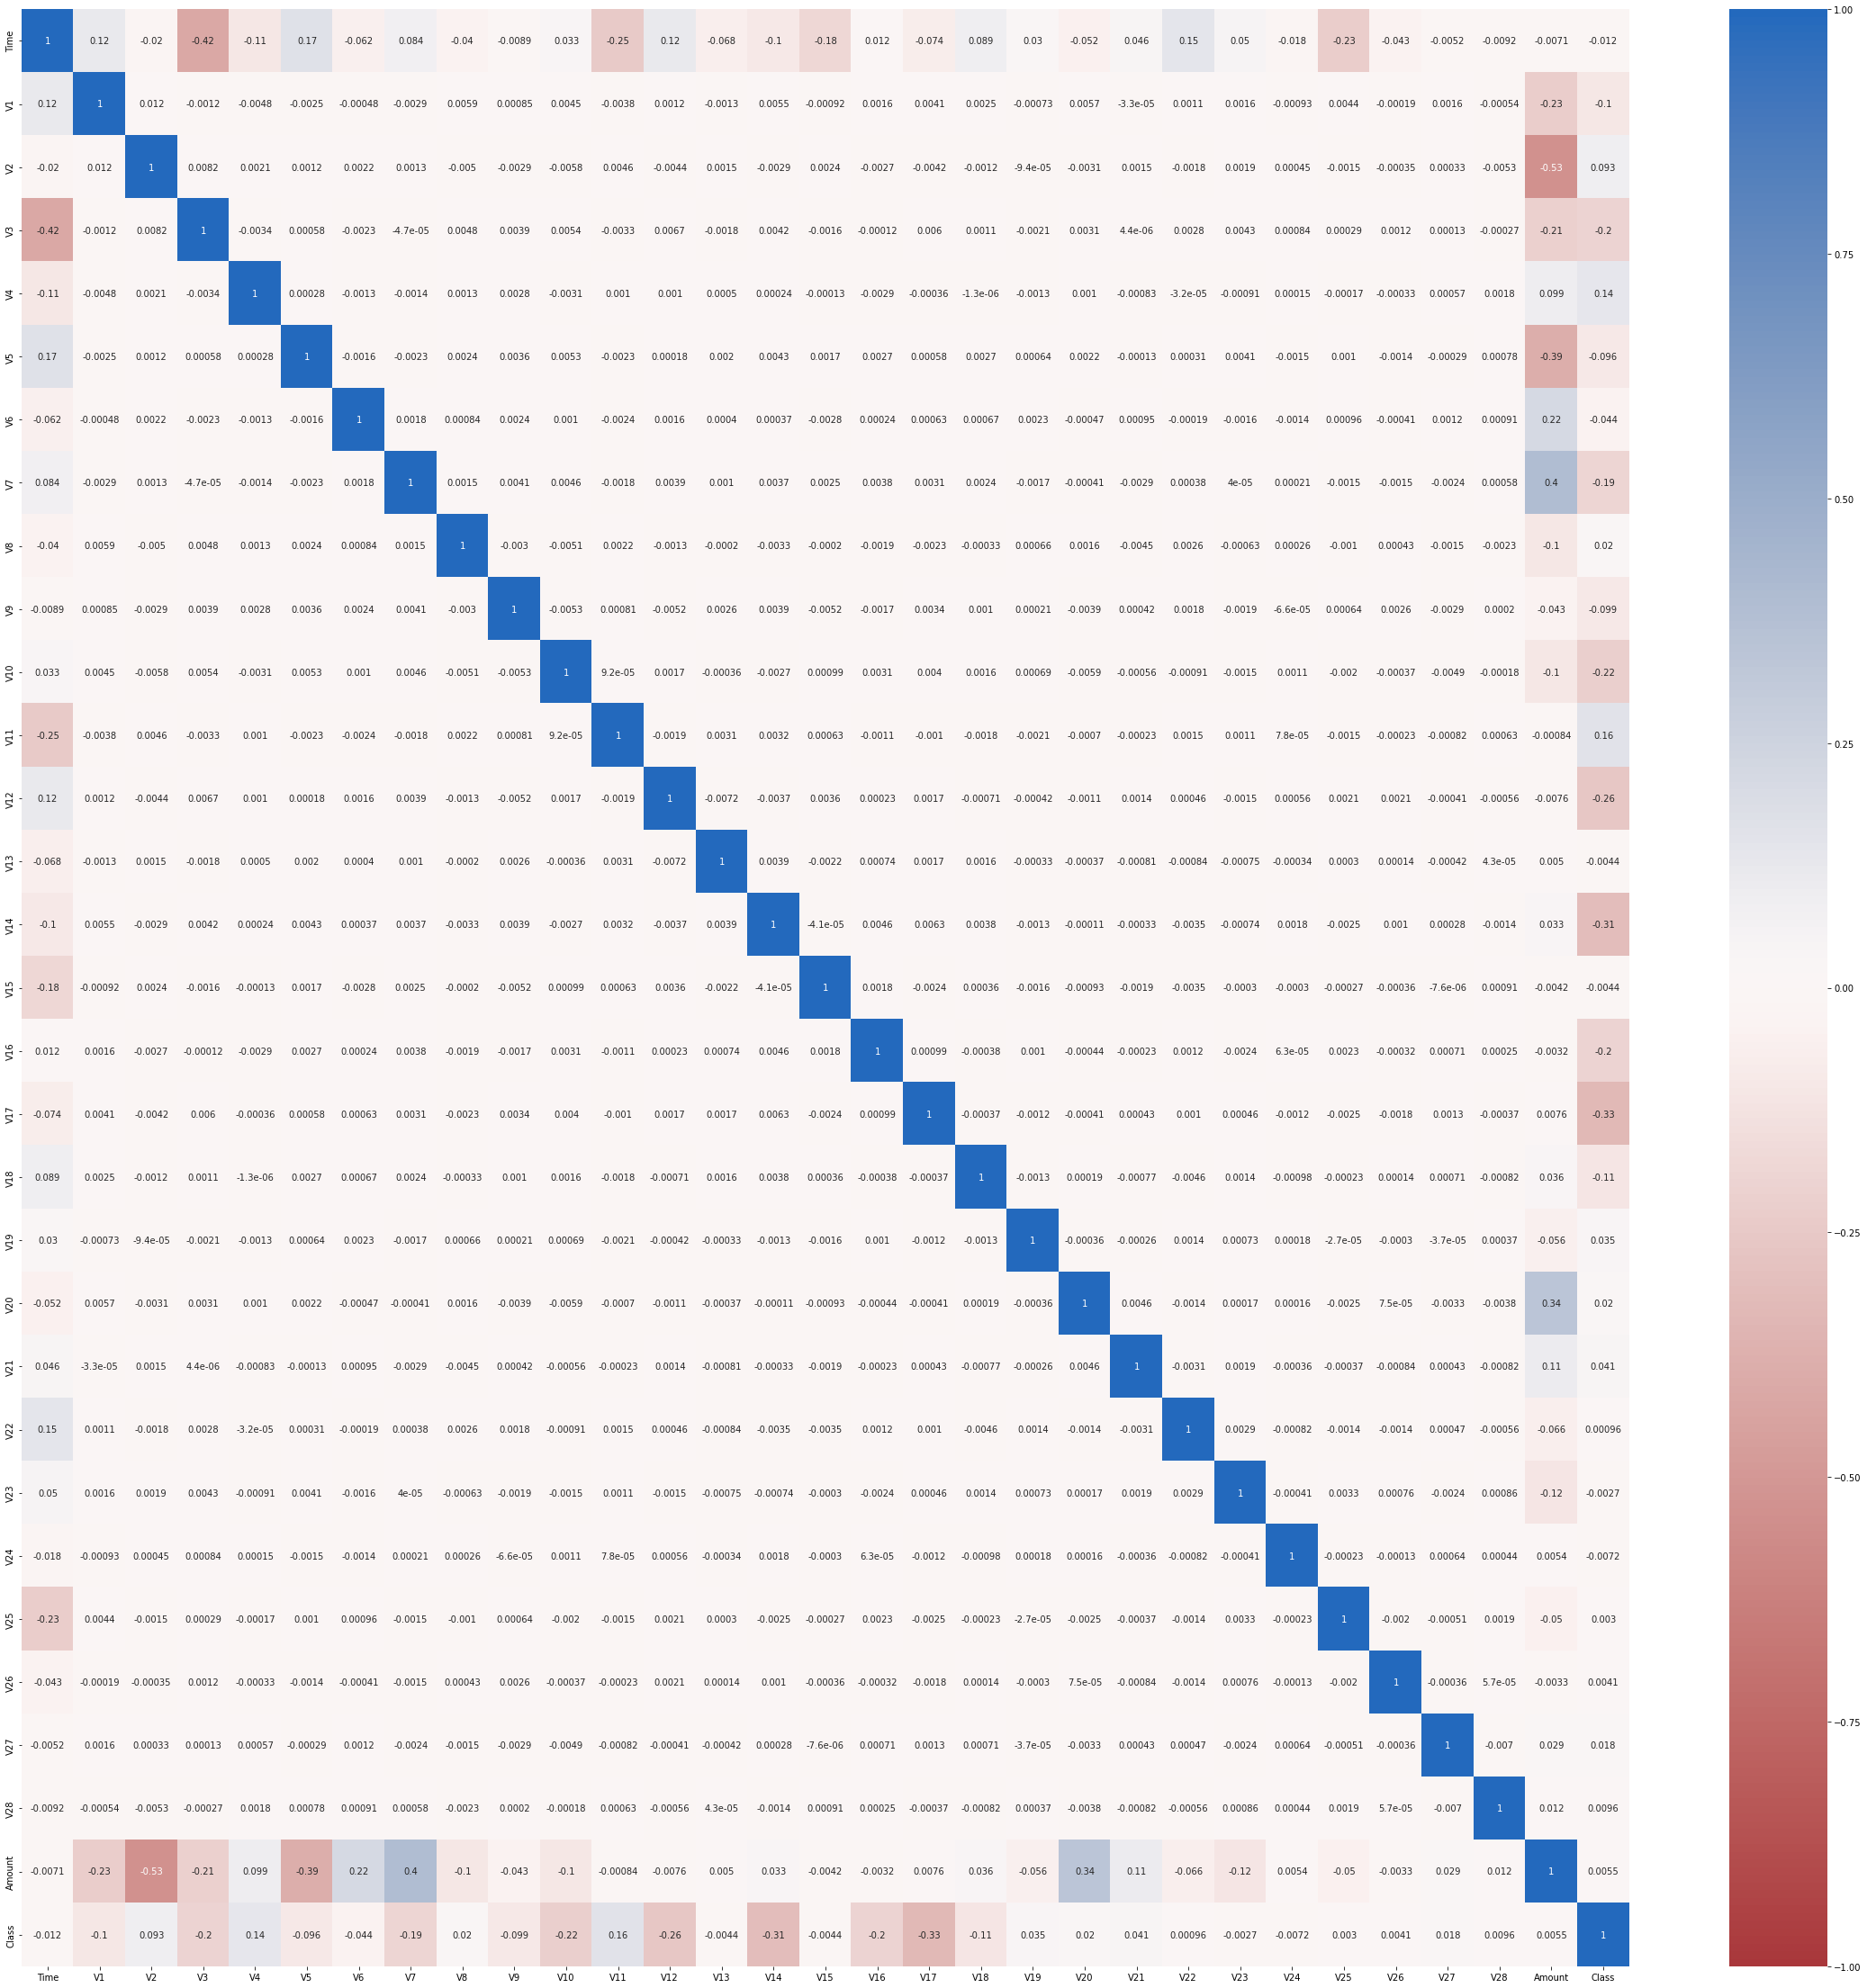

In [96]:
fig, ax = plt.subplots(figsize=(40,40))   
sns.heatmap(dataset.corr(),ax = ax,  annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)

Show the values assigned to each attribute for those transactions that are classified as fraudulent (`red`) compared to those that are not fraudolent (`green`).

The plots are zoomed-in versions of the real plots to better display the red values

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


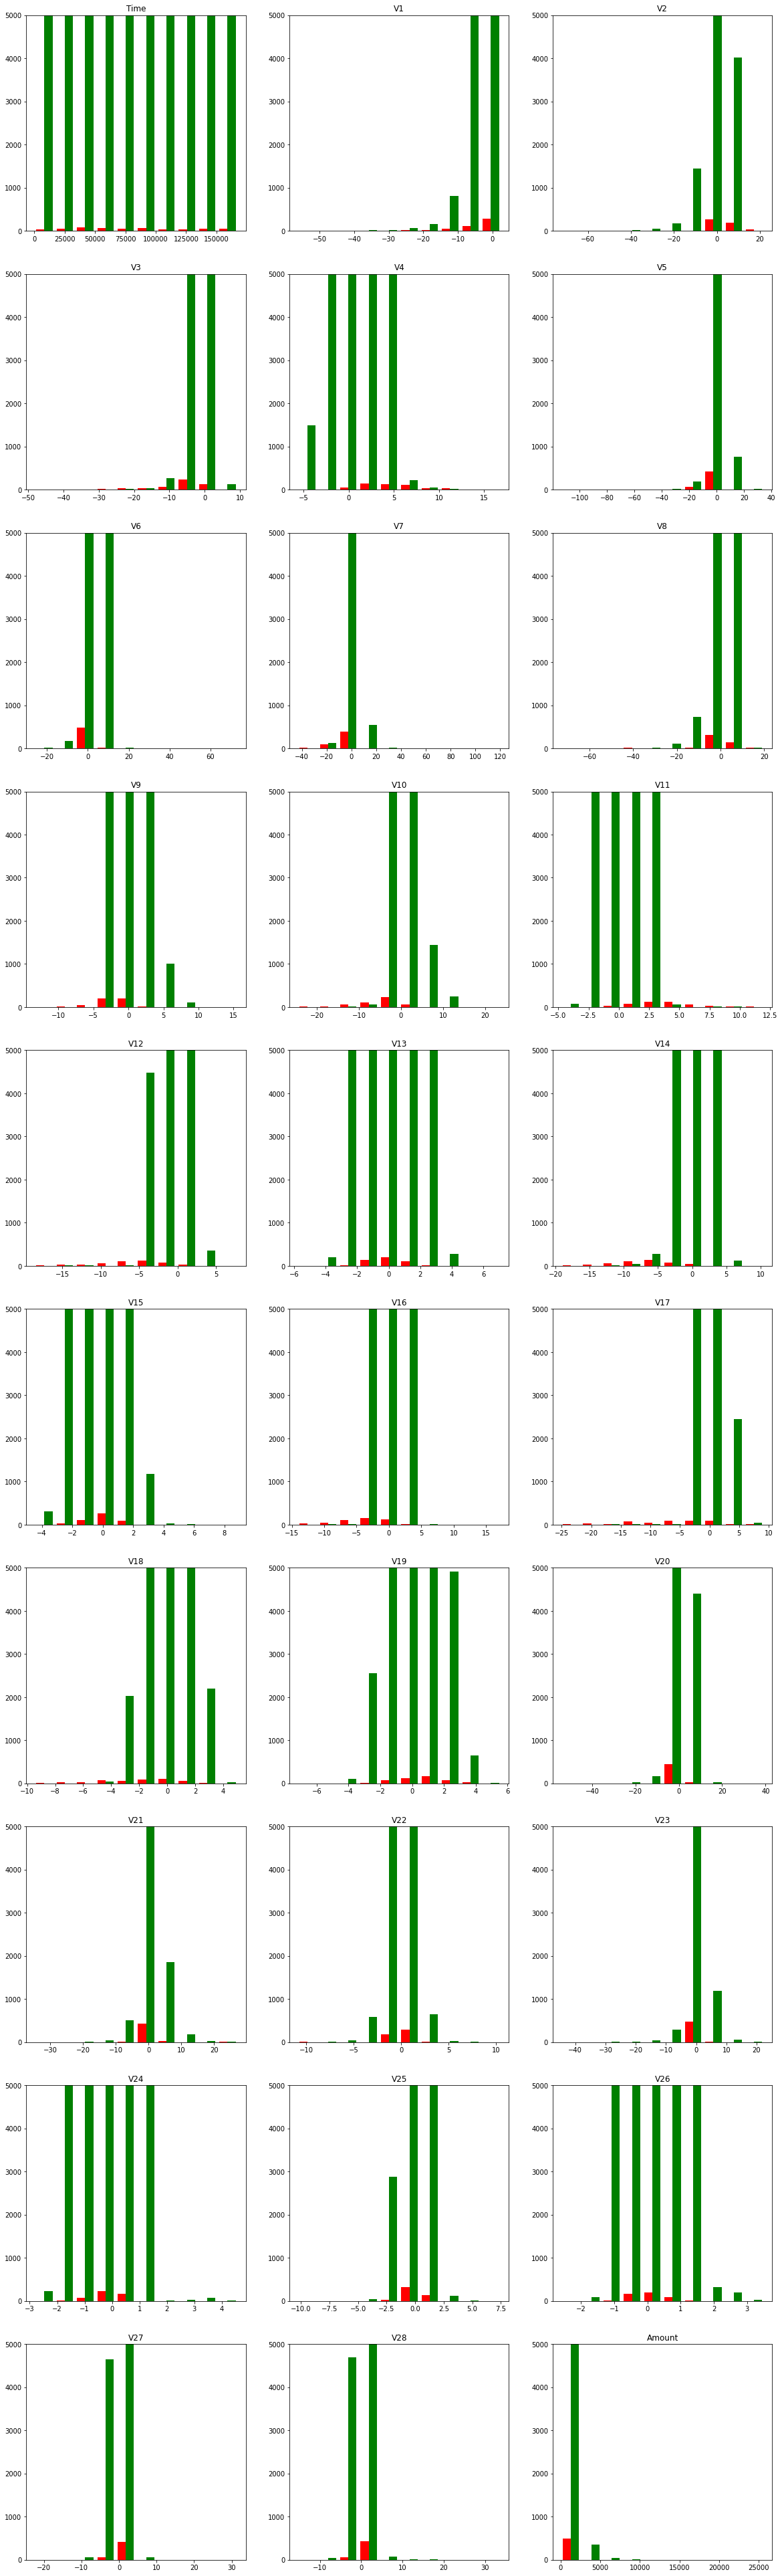

In [97]:
# split the dataset in fraud and no-fraud subsets
fraud = dataset[dataset["Class"] == 1]
no_fraud = dataset[dataset["Class"] == 0]

# create the subplot schema
fig, ax = plt.subplots(10, 3, sharex=False, sharey=False, figsize=(20,70))

n = 30 # number of columns to be printed   
colors = ['red', 'green']

axis = ax.flatten()

for i,j in zip(range(n), axis):
    j.hist([fraud.iloc[:,i], no_fraud.iloc[:,i]], color=colors)
    j.set_title(fraud.columns[i])
    j.set_ylim(top = 5000) # fix y top limit to 5000

## Data Normalization

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

We apply this technique to all the columns of the dataset except for `Class`

In [98]:
# remove 'Class' column
dataset_to_be_normalized = dataset.iloc[:,:-1]

# compute the mean 
data_mean = dataset_to_be_normalized.mean()
# compute the standard deviation
data_std = dataset_to_be_normalized.std()
# normalize the data
data_normalized = (dataset_to_be_normalized - data_mean) / data_std

# append 'Class' column
data_normalized['Class'] = dataset.iloc[:,-1]

Display the distribution of the new values

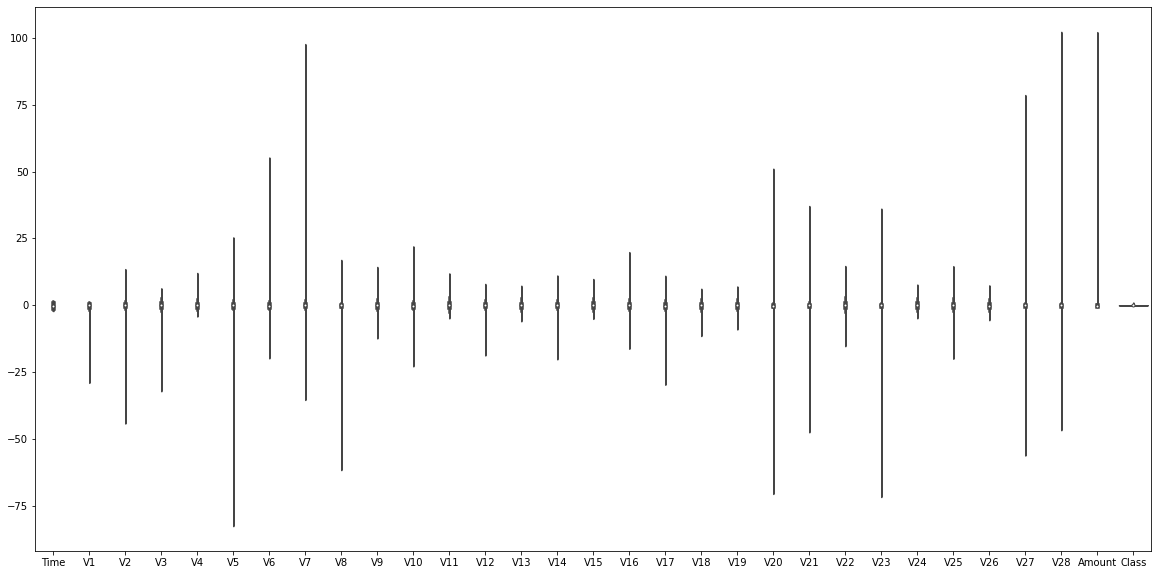

In [99]:
_, ax = plt.subplots(figsize=(20,10))
sns.violinplot(data = data_normalized, ax = ax)

## Dataset division - Train-validation split

Shuffle the data using the np.random.shuffle function and split the data as follows:

- put 70% in the training dataset
- put 30% in the validation dataset

In [125]:
# define parameter : test_set / training_set
fraction_validation = 0.3 # 30% of test set and 70% of training set

# parse to numpy
data_normalized_np = data_normalized.to_numpy()

# shuffle data
np.random.seed(0) # set seed to 0 for reproducibility
np.random.shuffle(data_normalized_np) 

# divide into training_set and test_set
num_train = int(data_normalized_np.shape[0] * (1 - fraction_validation))

train_set = data_normalized_np[:num_train,:]
valid_set = data_normalized_np[num_train:,:]

print('train set size     : %d' % train_set.shape[0])
print('validation set size: %d' % valid_set.shape[0])

train set size     : 194049
validation set size: 83165


Visualize the dimensions of the sets 

In [126]:
print('Dataset: ')
print('Number of fraud transactions     : %d' % sum(dataset["Class"]))
print('Number of non-fraud transactions : %d' % sum(dataset["Class"] == 0))
print('Number of transactions           : %d' % dataset["Class"].shape[0])

print('\nTraining set: ')
print('Number of fraud transactions     : %d' % np.sum(train_set[:,data_normalized_np.shape[1]-1]))
print('Number of non-fraud transactions : %d' % np.sum(train_set[:,data_normalized_np.shape[1]-1]  == 0))
print('Number of transactions           : %d' % train_set.shape[0])

print('\nValidation set: ')
print('Number of fraud transactions     : %d' % np.sum(valid_set[:,data_normalized_np.shape[1]-1]))
print('Number of non-fraud transactions : %d' % np.sum(valid_set[:,data_normalized_np.shape[1]-1] == 0))
print('Number of transactions           : %d' % valid_set.shape[0])

Dataset: 
Number of fraud transactions     : 487
Number of non-fraud transactions : 276727
Number of transactions           : 277214

Training set: 
Number of fraud transactions     : 338
Number of non-fraud transactions : 193711
Number of transactions           : 194049

Validation set: 
Number of fraud transactions     : 149
Number of non-fraud transactions : 83016
Number of transactions           : 83165


## Preprocess data - Random under sampling

The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.


*   Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
*   Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

*This method is valid under the hypothesis that the number of the no-fraud transaction is more than a hundred times the number of fraud ones*


In [127]:
def RUS(ratio, training_set):
  '''It returns a list obtained by merging two lists, one containing the fraud training set and the
  other containing the non-fraud training set.
  The ratio parameter defines the ratio fraud/non-fraud.
  e.g.: ratio=1 and len(train_fraud)= 100 implies that len(new_train_not_fraud)=100.
  
  @param: ratio It is the ratio between fraud and non-fraud data; it is defined as: ratio:=fraud_set/non-fraud_set.
  @param training_set It is the training set.
  '''
  # initialize the two lists
  train_fraud = list()
  train_not_fraud = list()

  # for each sample in the training set, append it to the proper class
  for sample in training_set:
    if sample[30] == 1:
      train_fraud.append(sample)
    else:
      train_not_fraud.append(sample)
  
  print('train_fraud len        : ', len(train_fraud))
  print('train_not_fraud len    : ', len(train_not_fraud))
  
  # compute new length of train_not_fraud
  new_length_train_not_fraud = int(len(train_fraud) / ratio)
  print('new train_not_fraud len: ', new_length_train_not_fraud)

  # shuffle train_not_fraud
  np.random.seed(0) # set seed to 0 for reproducibility
  np.random.shuffle(train_not_fraud)

  # take the first new_length_train_not_fraud elements from train_not_fraud
  train_not_fraud_reduced = train_not_fraud[0:new_length_train_not_fraud]

  # create a unique list for the training set
  train_fraud.extend(train_not_fraud_reduced)

  # shuffle the result set
  np.random.seed(0) # set seed to 0 for reproducibility
  np.random.shuffle(train_fraud)

  print('new training set len   : ', len(train_fraud))
  print('\n')

  # return the whole new training set
  return train_fraud

In [128]:
# define parameters -> inside the training_set: fraud / non-fraud
ratio1 = 1 # 50:50
ratio2 = 34/66 # 34:66
ratio3 = 1/3 # 25:75

Apply random under sampling to the training set

In [129]:
training_set1 = RUS(ratio1, train_set)
training_set2 = RUS(ratio2, train_set)
training_set3 = RUS(ratio3, train_set)

train_fraud len        :  338
train_not_fraud len    :  193711
new train_not_fraud len:  338
new training set len   :  676


train_fraud len        :  338
train_not_fraud len    :  193711
new train_not_fraud len:  656
new training set len   :  994


train_fraud len        :  338
train_not_fraud len    :  193711
new train_not_fraud len:  1014
new training set len   :  1352




## Classification techniques - Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

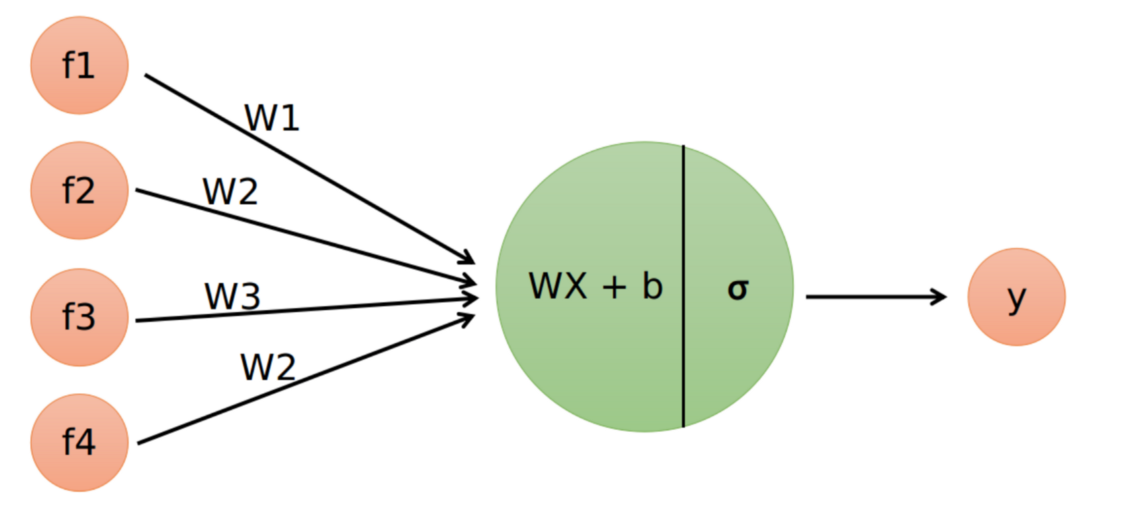

Firstly we define some useful functions

**Sigmoid function**, also called logistic sigmoid function, has the role of activation function.  It is define as 



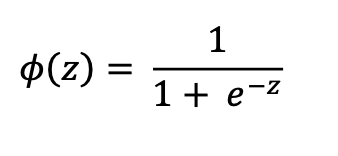

where z is 

> *z = w * x + b*

and

> *w = weights*

> *x = features*

> *b = bias*


In [130]:
def sigmoid(z):
  """
  This function returns the value of the sigmoid function given an input value

  @params: z: a linear combination of the input and the features associated with the training examples
  """
  return (1/(1+jnp.exp(-z)))

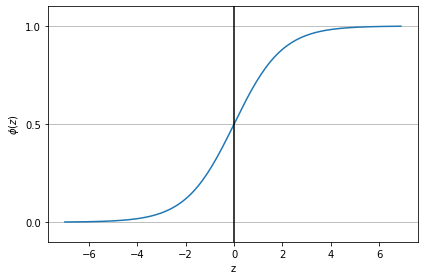

In [131]:
# print the sigmoid function in the range (-7 , +7)

# define range
z = np.arange(-7, 7, 0.1) 

# calculate the sigmoid
phi_z = sigmoid(z) 
plt.plot(z, phi_z)

plt.axvline(0.0, color='k') 
plt.ylim(-0.1, 1.1)

# add labels 
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# add y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # get current axis
ax.yaxis.grid(True) # display axis 
plt.tight_layout() # adjust the padding between and around subplots

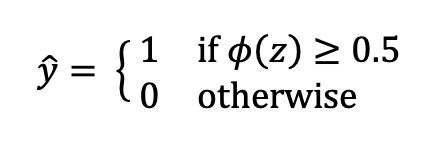

The output of the sigmoid function is interpreted as the probability of
a particular example belonging to class 1.

**Loss** can be defined as the error that is present between the actual output and the predicted output. We want the value of the loss function to be as low as possible as it would reduce the loss and the predicted value would be close to the actual value. We will use the following loss function

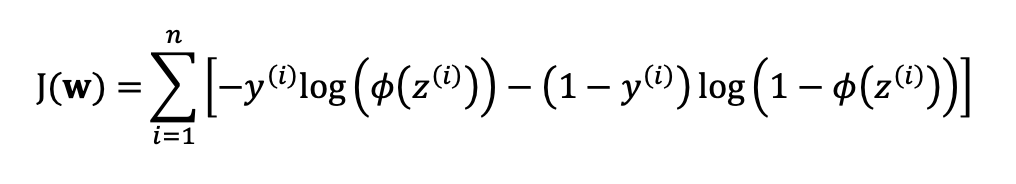

where `log` refers to the natural log

In [132]:
def loss(x,y,params):
  """
  This function estimates the cost we want to minimize. The cost is the discrepancy between the real output and the predicted one

  @params: x: feature's list
  @params: y: real output
  @params: params: weights and bias
  """
  # initialize the cost 
  cost = 0.
  weights = params[:-1]
  bias = params[-1]

  # for each sample calculate the predicted value and so the loss
  for i in range(len(x[0])):
    # calculate the sigmoid
    yHat = sigmoid(jnp.dot(weights,x[i]) + bias)
    not_yHat = 1-yHat
    # to prevent the computation of log(0) = inf, the argument of the logarithm will be pre-defined
    value = y[i]*yHat + (1-y[i])*not_yHat
    cost += (-jnp.log(value))

  return (cost)

The following plot shows the sigmoid activation on the x-axis in the range 0 to 1 (the inputs to the sigmoid function were z values in the range –10 to 10) and the associated logistic cost on the y-axis

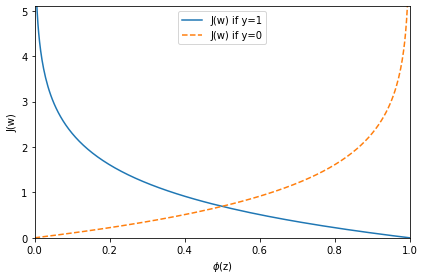

In [133]:
# print log function 
def cost_1(z):
  return - np.log(sigmoid(z))

def cost_0(z):
  return - np.log(1 - sigmoid(z))

# define the range
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# impose the limits 
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

# add the axis legend
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

# add legend
plt.legend(loc='best') 
plt.tight_layout() 

At the beginning, all the weights and the bias are initialized to 0

In [109]:
def initialize_params(weight_size):
  """
  The purpose of this function is to initialize the weights and bias

  @params: weight_size: number of features 
  @return: array of dimention (weights_size + 1) initialize to zero 
  """
  return np.zeros(weight_size + 1 ) 

Algorithm: 

1. divide the training set into features and expected results 
2. initialize the hyperparameters
3. according to the gradient descent rule, update parameters

In [110]:
def logistic_regression(training_set):
  """
  This function trains the model  

  @params: training_set: bunches of samples 
  @return: update parameters
  """

  # initialize the lists
  x_train = list()
  y_train = list()

  # split the set into features and results
  for sample in training_set:
    x_train.append(sample[:-1])
    y_train.append(sample[-1])

  # inizialize hyperparameters
  num_epochs = 2000
  learning_rate = 1e-1
  params = initialize_params(len(x_train[0]))

  # use `jax.jit` to speedup the evaluation of the loss and of the gradients
  grad_jit = jax.jit(jax.grad(loss, argnums=2))
  loss_jit = jax.jit(loss)

  # save the history of the loss function in order to print it at the end of the 
  # training process
  train_history = [loss_jit(x_train, y_train, params)]

  # show the progress bar:
  t0 = time.time()
  # training loop
  for epoch in tqdm(range(num_epochs)):
    # caluclate the gradient 
    gradients = grad_jit(x_train, y_train, params)
    for i in range(len(params)):
      # update the parameters
      params[i] -= learning_rate * gradients[i]
    train_history.append(loss_jit(x_train, y_train, params))
  
  print('train loss       : %1.3e' % train_history[-1])
  plt.loglog(train_history, label = 'train loss')

  return params.copy()

Train and Test

  0%|          | 0/2000 [00:00<?, ?it/s]

train loss       : 3.577e-03
validation loss 1: 2.380e+01 



  0%|          | 0/2000 [00:00<?, ?it/s]

train loss       : 4.136e-03
validation loss 2: 7.254e-01 



  0%|          | 0/2000 [00:00<?, ?it/s]

train loss       : 4.391e-03
validation loss 3: 1.869e+01 



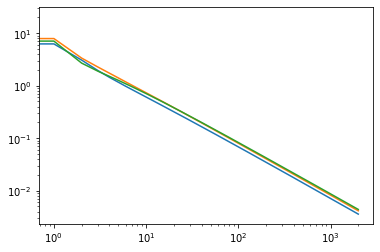

In [134]:
# split the validation set in a set contains featatures and one contains results
x_valid = list()
y_valid = list()

for sample in valid_set:
  x_valid.append(sample[:-1])
  y_valid.append(sample[-1])

# train the model
params1 = logistic_regression(training_set1)

# test the model 
print('validation loss 1: %1.3e \n' % loss(x_valid,y_valid,params1))

# train the model
params2 = logistic_regression(training_set2)

# test the model 
print('validation loss 2: %1.3e \n' % loss(x_valid,y_valid,params2))

# train the model
params3 = logistic_regression(training_set3)

# test the model 
print('validation loss 3: %1.3e \n' % loss(x_valid,y_valid,params3))

Collect all the yHat in a list

In [135]:
def predicted_results(x,params):
  """
  This function assigns to each sample the predicted output

  @params: x: samples
  @params: params: weights and bias
  @return: list of predicted output
  """
  # initialize an empty list
  prediction = list()

  # for each sample compute the sigmoid function 
  for i in range(len(x)):
    weights = params[:-1]
    bias = params[-1]
    # cast the result to 1 if sigmoid >= 0.5 
    if(sigmoid(jnp.dot(weights,x[i])+ bias)) >= 0.5:
      prediction.append(1.)
    else:
      prediction.append(0.)
  return prediction

prediction1 = predicted_results(x_valid,params1)
prediction2 = predicted_results(x_valid,params2)
prediction3 = predicted_results(x_valid,params3)

## Performance evaluation

Calculete the parametes 

In [136]:
# true positive
TP1 = 0 
TP2 = 0
TP3 = 0

# true negative
TN1 = 0
TN2 = 0
TN3 = 0

# false positive
FP1 = 0 
FP2 = 0
FP3 = 0

# false negative
FN1 = 0
FN2 = 0
FN3 = 0

for i in range(len(y_valid)):
  if (y_valid[i] == 1) and (prediction1[i]== 1 ):
    TP1 += 1
  if (y_valid[i] == 0) and (prediction1[i] == 0):
    TN1 += 1
  if (y_valid[i] == 0) and (prediction1[i]== 1 ):
    FP1 += 1
  if (y_valid[i] == 1) and (prediction1[i] == 0):
    FN1 += 1

  if (y_valid[i] == 1) and (prediction2[i]== 1 ):
    TP2 += 1
  if (y_valid[i] == 0) and (prediction2[i] == 0):
    TN2 += 1
  if (y_valid[i] == 0) and (prediction2[i]== 1 ):
    FP2 += 1
  if (y_valid[i] == 1) and (prediction2[i] == 0):
    FN2 += 1

  if (y_valid[i] == 1) and (prediction3[i]== 1 ):
    TP3 += 1
  if (y_valid[i] == 0) and (prediction3[i] == 0):
    TN3 += 1
  if (y_valid[i] == 0) and (prediction3[i]== 1 ):
    FP3 += 1
  if (y_valid[i] == 1) and (prediction3[i] == 0):
    FN3 += 1

print("TP1: %d" % TP1)
print("TN1: %d" % TN1)
print("FP1: %d" % FP1)
print("FN1: %d\n" % FN1)

print("TP2: %d" % TP2)
print("TN2: %d" % TN2)
print("FP2: %d" % FP2)
print("FN2: %d\n" % FN2)

print("TP3: %d" % TP3)
print("TN3: %d" % TN3)
print("FP3: %d" % FP3)
print("FN3: %d" % FN3)

TP1: 133
TN1: 61067
FP1: 21949
FN1: 16

TP2: 128
TN2: 76883
FP2: 6133
FN2: 21

TP3: 129
TN3: 75113
FP3: 7903
FN3: 20


###Accuracy 
Defined as the ratio of the total number of predicted transactions that are correct

In [137]:
def accuracy(TP,TN,FP,FN):
  return ((TP + TN) / (TP + FP + TN + FN))

### Sensitivity 

The proportion of positive observed values correctly predicted as positive. It is also called as True Positive Rate (TPR) or Recall

In [115]:
def sensitivity(TP,FN):
  return (TP/(TP+FN))

### Specificity 
Defined as, with how much accuracy the negative (legitimate) cases are classified and, in our case, it gives the accuracy on prediction of legitimate transactions classification. It is also called as True Negative Rate (TNR)

In [116]:
def specificity(TN,FP):
  return (TN/(FP+TN))

### Precision 
The proportion of positive (fraud) predictions that are actually correct 

In [117]:
def precision(TP,FP):
  return (TP/(TP+FP))

### F-measure 
It gives the accuracy of the test which means that it gives the accuracy of experiments performed. It uses the both precision and recall to compute its value. The best value for f1 score is considered at value 1

In [118]:
def F_measure(precision,sensitivity):
  return (2 * ((precision * sensitivity)/(precision + sensitivity)))

### Area under curve (AUC) 

It represents degree or measure of separability that is how much model is capable of differentiating between the classes

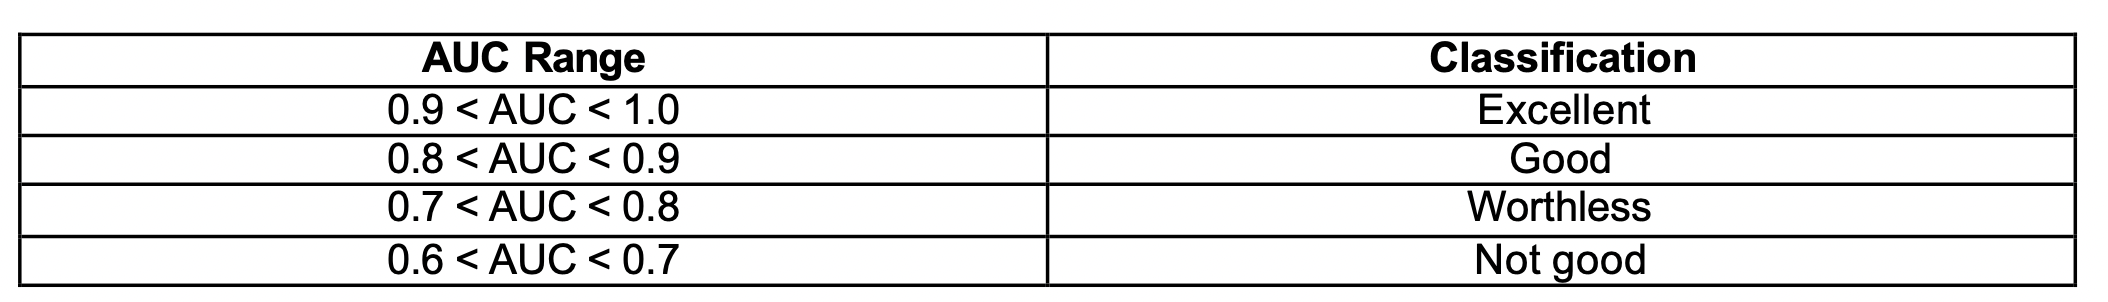

In [119]:
def AUC(sensitivity, specificity):
  return (0.5 * (sensitivity + specificity))

Summary :

In [138]:
acc1 = accuracy(TP1,TN1,FP1,FN1)
sens1 = sensitivity(TP1,FN1)
spec1 = specificity(TN1,FP1)
prec1 = precision(TP1,FP1)
f_me1 = F_measure(prec1,sens1)
auc1 = AUC(sens1,spec1)

acc2 = accuracy(TP2,TN2,FP2,FN2)
sens2 = sensitivity(TP2,FN2)
spec2 = specificity(TN2,FP2)
prec2 = precision(TP2,FP2)
f_me2 = F_measure(prec2,sens2)
auc2 = AUC(sens2,spec2)

acc3 = accuracy(TP3,TN3,FP3,FN3)
sens3 = sensitivity(TP3,FN3)
spec3 = specificity(TN3,FP3)
prec3 = precision(TP3,FP3)
f_me3 = F_measure(prec3,sens3)
auc3 = AUC(sens3,spec3)

print('Accurancy   ' + '{:.1%}'.format(acc1))
print('Sensitivity ' + '{:.1%}'.format(sens1))
print('Specificity ' + '{:.1%}'.format(spec1))
print('Precision   ' + '{:.1%}'.format(prec1))
print('F_measure   ' + '{:.1%}'.format(f_me1))
print('AUC         ' + '{:.1%}'.format(auc1) + '\n')

print('Accurancy   ' + '{:.1%}'.format(acc2))
print('Sensitivity ' + '{:.1%}'.format(sens2))
print('Specificity ' + '{:.1%}'.format(spec2))
print('Precision   ' + '{:.1%}'.format(prec2))
print('F_measure   ' + '{:.1%}'.format(f_me2))
print('AUC         ' + '{:.1%}'.format(auc2) + '\n')

print('Accurancy   ' + '{:.1%}'.format(acc3))
print('Sensitivity ' + '{:.1%}'.format(sens3))
print('Specificity ' + '{:.1%}'.format(spec3))
print('Precision   ' + '{:.1%}'.format(prec3))
print('F_measure   ' + '{:.1%}'.format(f_me3))
print('AUC         ' + '{:.1%}'.format(auc3))

Accurancy   73.6%
Sensitivity 89.3%
Specificity 73.6%
Precision   0.6%
F_measure   1.2%
AUC         81.4%

Accurancy   92.6%
Sensitivity 85.9%
Specificity 92.6%
Precision   2.0%
F_measure   4.0%
AUC         89.3%

Accurancy   90.5%
Sensitivity 86.6%
Specificity 90.5%
Precision   1.6%
F_measure   3.2%
AUC         88.5%


Plot the results 



*   RUS 1 -> Random Under Sampling with ratio 50:50
*   RUS 2 -> Random Under Sampling with ratio 34:66
*   RUS 3 -> Random Under Sampling with ratio 25:75




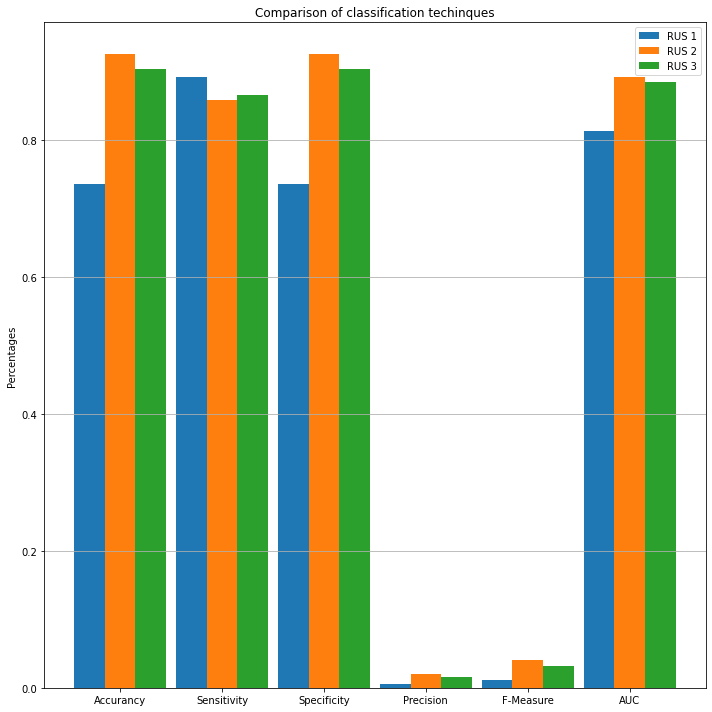

In [139]:
labels = ['Accurancy', 'Sensitivity', 'Specificity', 'Precision', 'F-Measure', 'AUC']
RUS1 = [acc1, sens1, spec1, prec1, f_me1, auc1]
RUS2 = [acc2, sens2, spec2, prec2, f_me2, auc2]
RUS3 = [acc3, sens3, spec3, prec3, f_me3, auc3]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width, RUS1, width, label='RUS 1')
rects2 = ax.bar(x, RUS2, width, label='RUS 2')
rects3 = ax.bar(x + width, RUS3, width, label='RUS 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Comparison of classification techinques')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax = plt.gca() # get current axis
ax.yaxis.grid(True) # plot the grid

fig.tight_layout() 